# Basic classification model with TensorFlow

In this project, I build an neural network to classify clothing images from the Fashion MNIST dataset.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, label_train), (x_test, label_test) = mnist.load_data()

Let's check if the data is loaded correctly.

In [4]:
print(f'Training data shape: {x_train.shape}')
print(f'Training data label shape: {label_train.shape}')

print(f'Test data shape: {x_test.shape}')
print(f'Test data label shape: {label_test.shape}')

nx = x_train.shape[2]
ny = x_train.shape[1]

Training data shape: (60000, 28, 28)
Training data label shape: (60000,)
Test data shape: (10000, 28, 28)
Test data label shape: (10000,)


Each image is mapped to a single label. Since the class names are not included with the dataset, we need to add them.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess the data

Before training the network, we need to normalize the pixel values to be in the range of 0 to 1.

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

To verify if the data is in the correct format, let's plot the first 25 images from the training set and display the class name below each image.

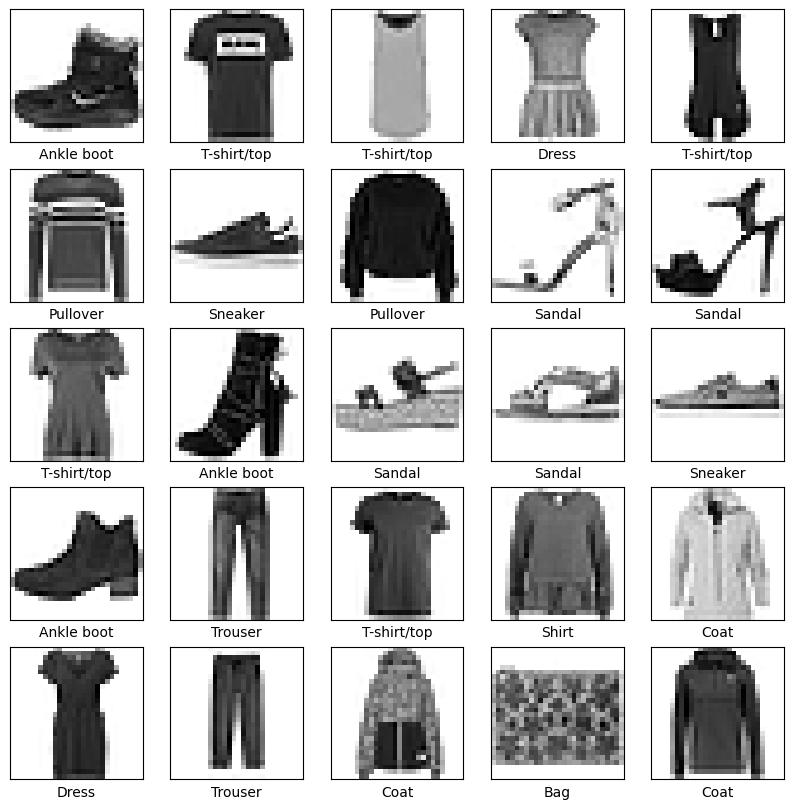

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[label_train[i]])
plt.show()

### Building the model

To build a neural network, we need to define the layers in the model. We can use the Sequential model, which is a linear stack of layers.

The first layer in this network, *tf.keras.layers.Flatten*, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.



In [8]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(ny, nx)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/home/kelly/anaconda3/envs/science/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions. Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers. 


#### Train the model

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.




In [9]:
history = model.fit(x_train, label_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7730 - loss: 0.6424
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8593 - loss: 0.3931
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8767 - loss: 0.3408
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8855 - loss: 0.3163
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8931 - loss: 0.2901


#### Evaluate accuracy

Comparing how the model performs on the test dataset

In [10]:
test_loss, test_acc = model.evaluate(x_test, label_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8713 - loss: 0.3585

Test accuracy: 0.8712999820709229


This difference between the accuracy on the training set and the test set is an example of overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 

#### Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


To visualize the predictions, let's create a function to plot the images with the 3 most likely classes.

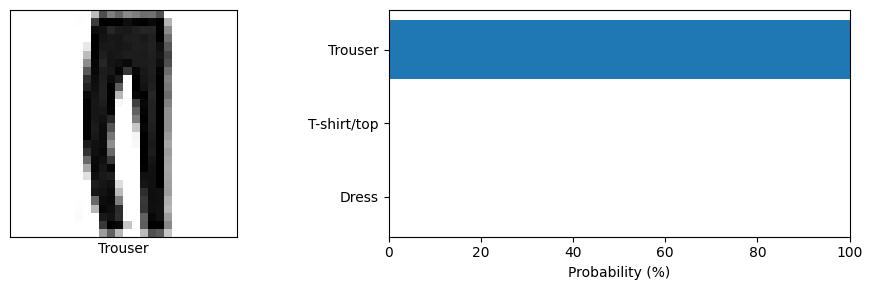

In [13]:
def plot_real(i, img):
    true_label, img = label_test[i], img[i]
    
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])

    plt.xlabel(class_names[true_label])


def plot_prediction(prediction_array):

    indices = np.argsort(prediction_array)[-3:]
    indices = indices[np.argsort(prediction_array[indices])]
    top_values = prediction_array[indices] 

    top_classes = [class_names[i] for i in indices]

    hbars = plt.barh(top_classes, top_values)
    plt.xlabel('Probability (%)')
    plt.xlim([0, 100])


# choose the item you want to plot
i = 2
prediction_array = predictions[i] * 100

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
# plot the real image label
plot_real(i, x_test)

plt.subplot(1, 2, 2)
plot_prediction(prediction_array)

plt.tight_layout()


Let's see if the model can predict the correct label for all the data or there are some errors.

Number of misclassified images: 1287


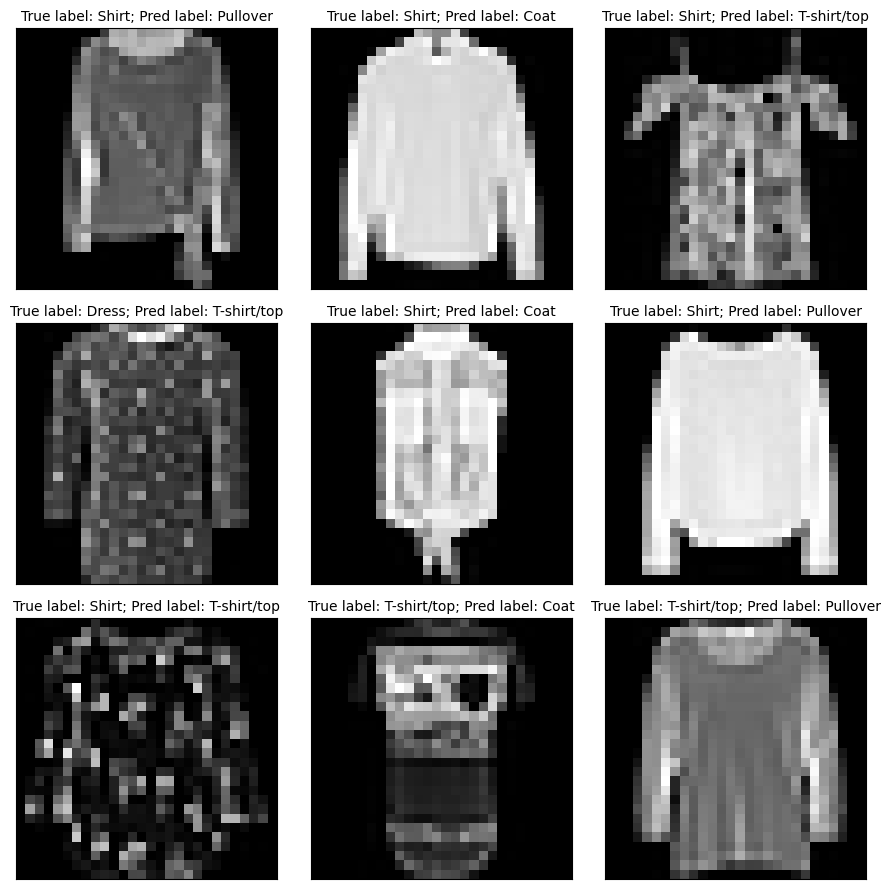

In [15]:
pred_label = predictions.argmax(axis=1)

misclassified_idx = np.where(label_test != pred_label)[0]
print(f'Number of misclassified images: {len(misclassified_idx)}')

plt.figure(figsize=(9,9))
for i in range(9):
    idx = np.random.choice(misclassified_idx)
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx].reshape((28,28)),cmap='gray')
    label_index = int(pred_label[idx])
    plt.title(f'True label: {class_names[label_test[idx]]}; Pred label: {class_names[pred_label[idx]]}', fontsize=10)

plt.tight_layout()
plt.show()